In [31]:
import pandas as pd


In [62]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [81]:
print(train.head())

   id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           125.0            1                      19  ...   

In [82]:
print(test.head())

      id  Marital status  Application mode  Application order  Course  \
0  76518               1                 1                  1    9500   
1  76519               1                 1                  1    9238   
2  76520               1                 1                  1    9238   
3  76521               1                44                  1    9147   
4  76522               1                39                  1    9670   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      39   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           141.0            1                       3  ...   
1                           128.0            1              

In [63]:
print("Missing Values in Training Data:")
print(train.isnull().sum())


Missing Values in Training Data:
id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                         

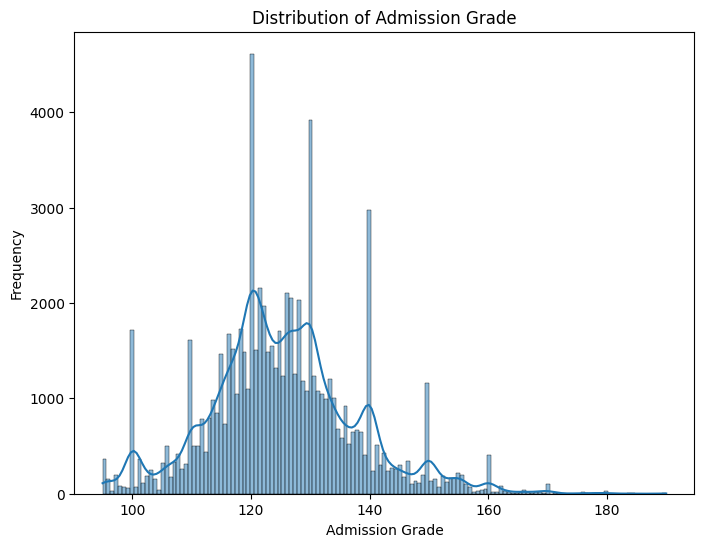

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(train['Admission grade'], kde=True)
plt.title('Distribution of Admission Grade')
plt.xlabel('Admission Grade')
plt.ylabel('Frequency')
plt.show()


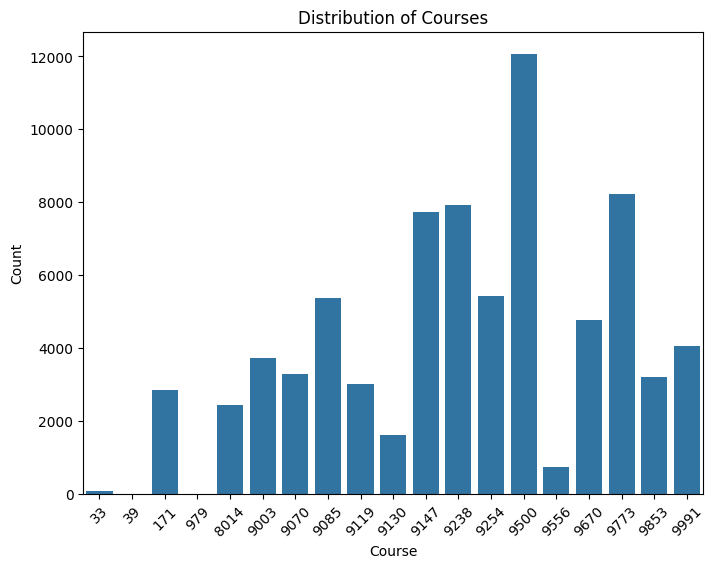

In [65]:
# Count plot for Course feature
plt.figure(figsize=(8,6))
sns.countplot(data=train, x='Course')
plt.title('Distribution of Courses')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


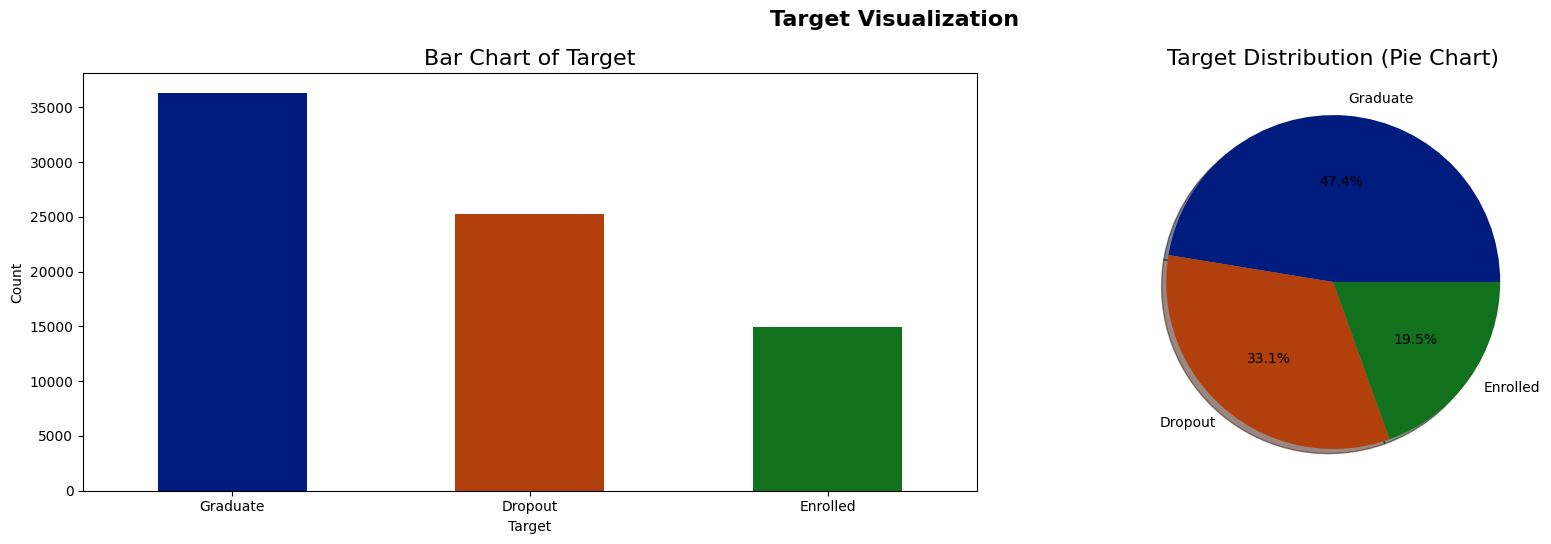

In [67]:
custom_palette = sns.color_palette("dark")

for column in categorical_variables:
    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))
    
    train[column].value_counts().plot(kind='bar', ax=ax[0], color=custom_palette, rot=0)
    ax[0].set_title(f'Bar Chart of {column}', fontsize=16)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Count')
    
    train[column].value_counts().plot.pie(
        autopct='%1.1f%%', ax=ax[1], shadow=True, colors=custom_palette, labels=train[column].value_counts().index
    )
    ax[1].set_ylabel('')
    ax[1].set_title(f'{column} Distribution (Pie Chart)', fontsize=16)
    
    plt.suptitle(f'{column} Visualization', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


In [66]:
categorical_variables = train.select_dtypes(include=[object, 'category']).columns.tolist()
print(f"Categorical Variables: {categorical_variables}")


Categorical Variables: ['Target']


In [68]:
from sklearn.preprocessing import LabelEncoder


categories = ['dropout', 'enrolled', 'graduate']
le = LabelEncoder()
train['Target'] = le.fit_transform(train['Target'])


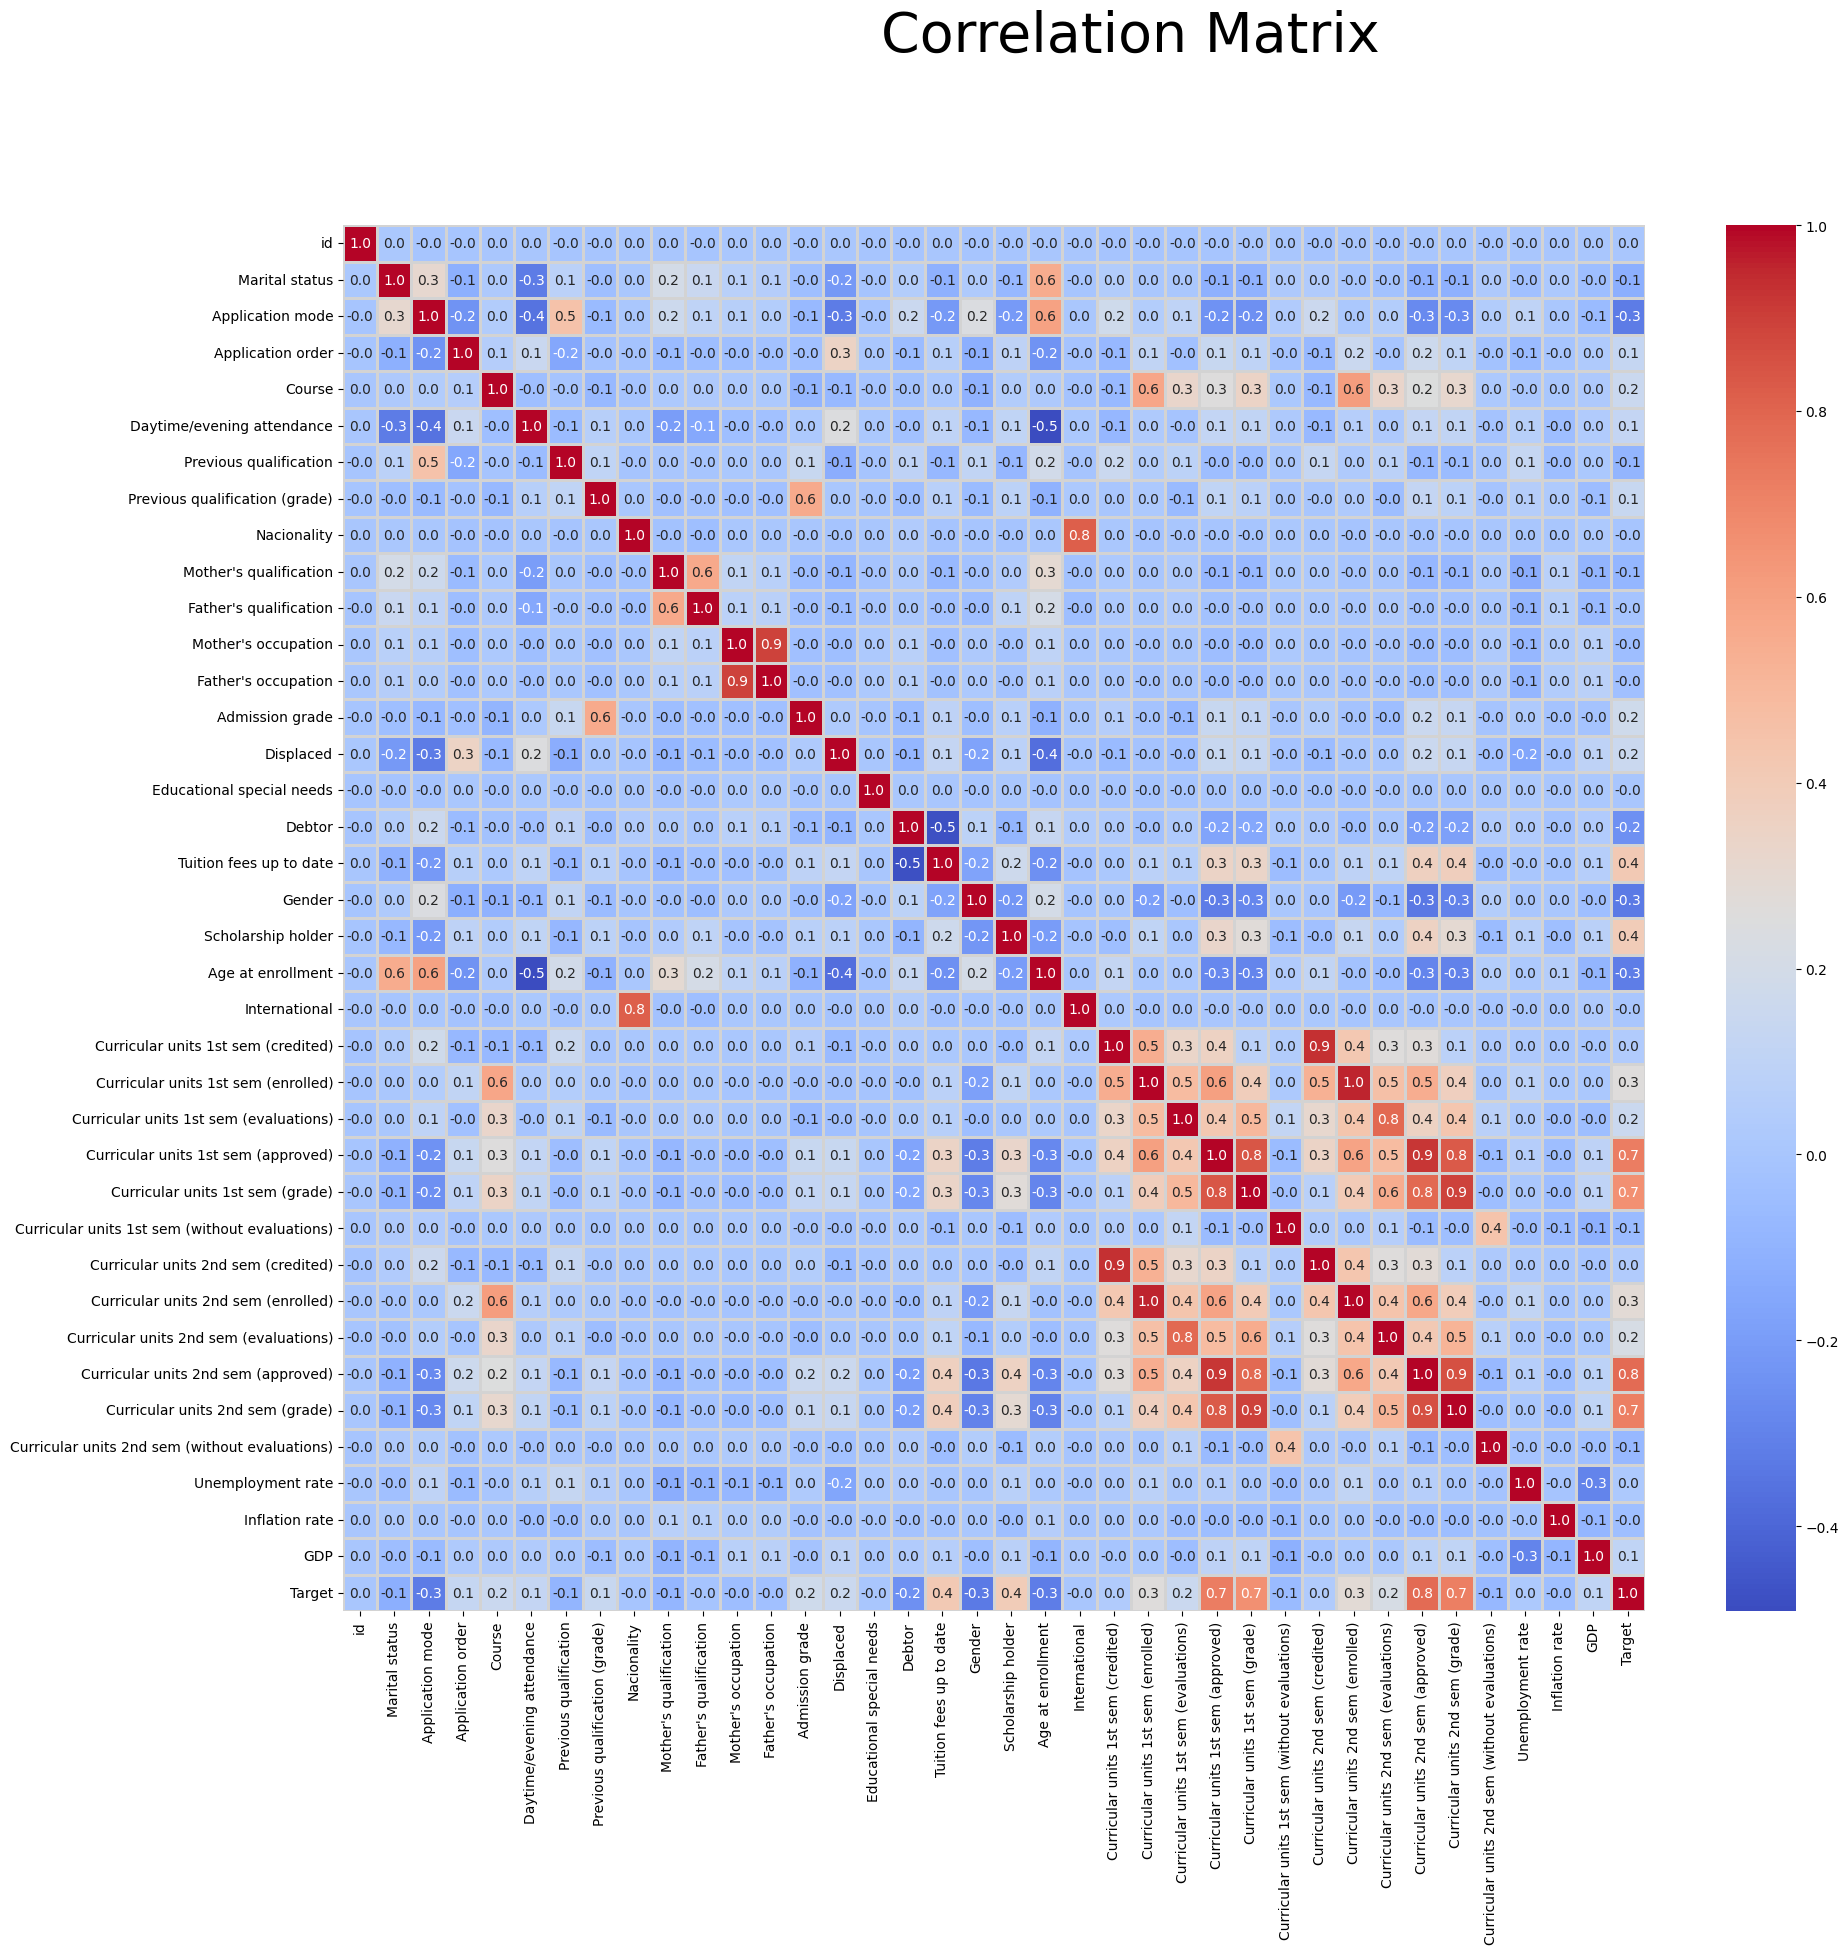

In [69]:
plt.figure(figsize=(21, 18))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()


In [70]:
print(train_cleaned.columns)


Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features and target
y = train["Target"]
X = train.drop("Target", axis=1)



# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, max_iter=1000000)
lr_model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=1000000, random_state=0)

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [79]:
from catboost import CatBoostClassifier

cb_Clas = CatBoostClassifier(random_state=42, verbose=0)
cb_Clas.fit(X_train_scaled, y_train)


In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_accuracies = {}

for model_name, model in models.items():
    # Predict on the validation set (no need to fit the model again)
    predictions = model.predict(X_val_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, predictions)
    model_accuracies[model_name] = accuracy
    
    # Print evaluation metrics
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, predictions))
    print("Classification Report:")
    print(classification_report(y_val, predictions))
    print("\n")


best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

print(f"The model with the highest accuracy is: {best_model_name} with an accuracy of {best_model_accuracy:.4f}")


Results for Logistic Regression:
Accuracy: 0.8189362258233142
Confusion Matrix:
[[4146  567  315]
 [ 367 1678  972]
 [ 149  401 6709]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      5028
           1       0.63      0.56      0.59      3017
           2       0.84      0.92      0.88      7259

    accuracy                           0.82     15304
   macro avg       0.79      0.77      0.78     15304
weighted avg       0.82      0.82      0.82     15304



Results for Random Forest:
Accuracy: 0.8277574490329326
Confusion Matrix:
[[4160  542  326]
 [ 348 1799  870]
 [ 112  438 6709]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5028
           1       0.65      0.60      0.62      3017
           2       0.85      0.92      0.88      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.78  

In [89]:
# Scaling the test data
test_scaled = scaler.transform(test)

try:
    test_preds = best_model.predict(test_scaled)
except CatBoostError as e:
    print(f"Prediction error: {e}")

test_preds = test_preds.flatten() if test_preds.ndim > 1 else test_preds

submission_class_names = [le.inverse_transform([pred])[0] for pred in test_preds]

submission_df = pd.DataFrame({
    "id": test_ids.values,  
    "Target": test_preds,   
    "Class_Name": submission_class_names  # Class names based on predictions
})

# Save the submission DataFrame to a CSV file with the name "Submission.csv"
submission_df.to_csv("Submission.csv", index=False)

print(f"Submission file created: Submission.csv\n")


Submission file created: Submission.csv



In [48]:
import pickle

best_model = models[best_model_name]

best_model.fit(X_train_scaled, y_train)

with open('catboost_best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print(f"The best model {best_model_name} has been saved to 'catboost_best_model.pkl'.")

The best model CatBoost has been saved to 'catboost_best_model.pkl'.
